# FOOTBALL MATCH WINNER 2018 PREDICTION



Import all libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from scipy.stats import poisson
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools
from IPython.display import display, HTML

Read the data

In [9]:
match_data = pd.read_csv("football-results-from-1872-to-2017.csv")
match_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
match_data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41581,10-01-2020,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,12-01-2020,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,15-01-2020,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,19-01-2020,El Salvador,Iceland,0,1,Friendly,Carson,United States,True
41585,01-02-2020,United States,Costa Rica,1,0,Friendly,Carson,United States,False


# Exploratory Data Analysis with Visualization

In [10]:
# print top 5 records 
match_data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [11]:
# print last 5 records
match_data.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41581,10-01-2020,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,12-01-2020,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,15-01-2020,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,19-01-2020,El Salvador,Iceland,0,1,Friendly,Carson,United States,True
41585,01-02-2020,United States,Costa Rica,1,0,Friendly,Carson,United States,False


In [12]:
# print out the columns of dataframe
match_data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [13]:
# datatype of each column
match_data.astype({'date':'datetime64[ns]'})
match_data.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [14]:
# lets check the types of tournaments in the dataframe
tournament = match_data['tournament'].value_counts()
tournament

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
OSN Cup                                     4
AFF Championship qualification              2
Copa América qualification                  2
Atlantic Heritage Cup                       2
Name: tournament, Length: 112, dtype: int64

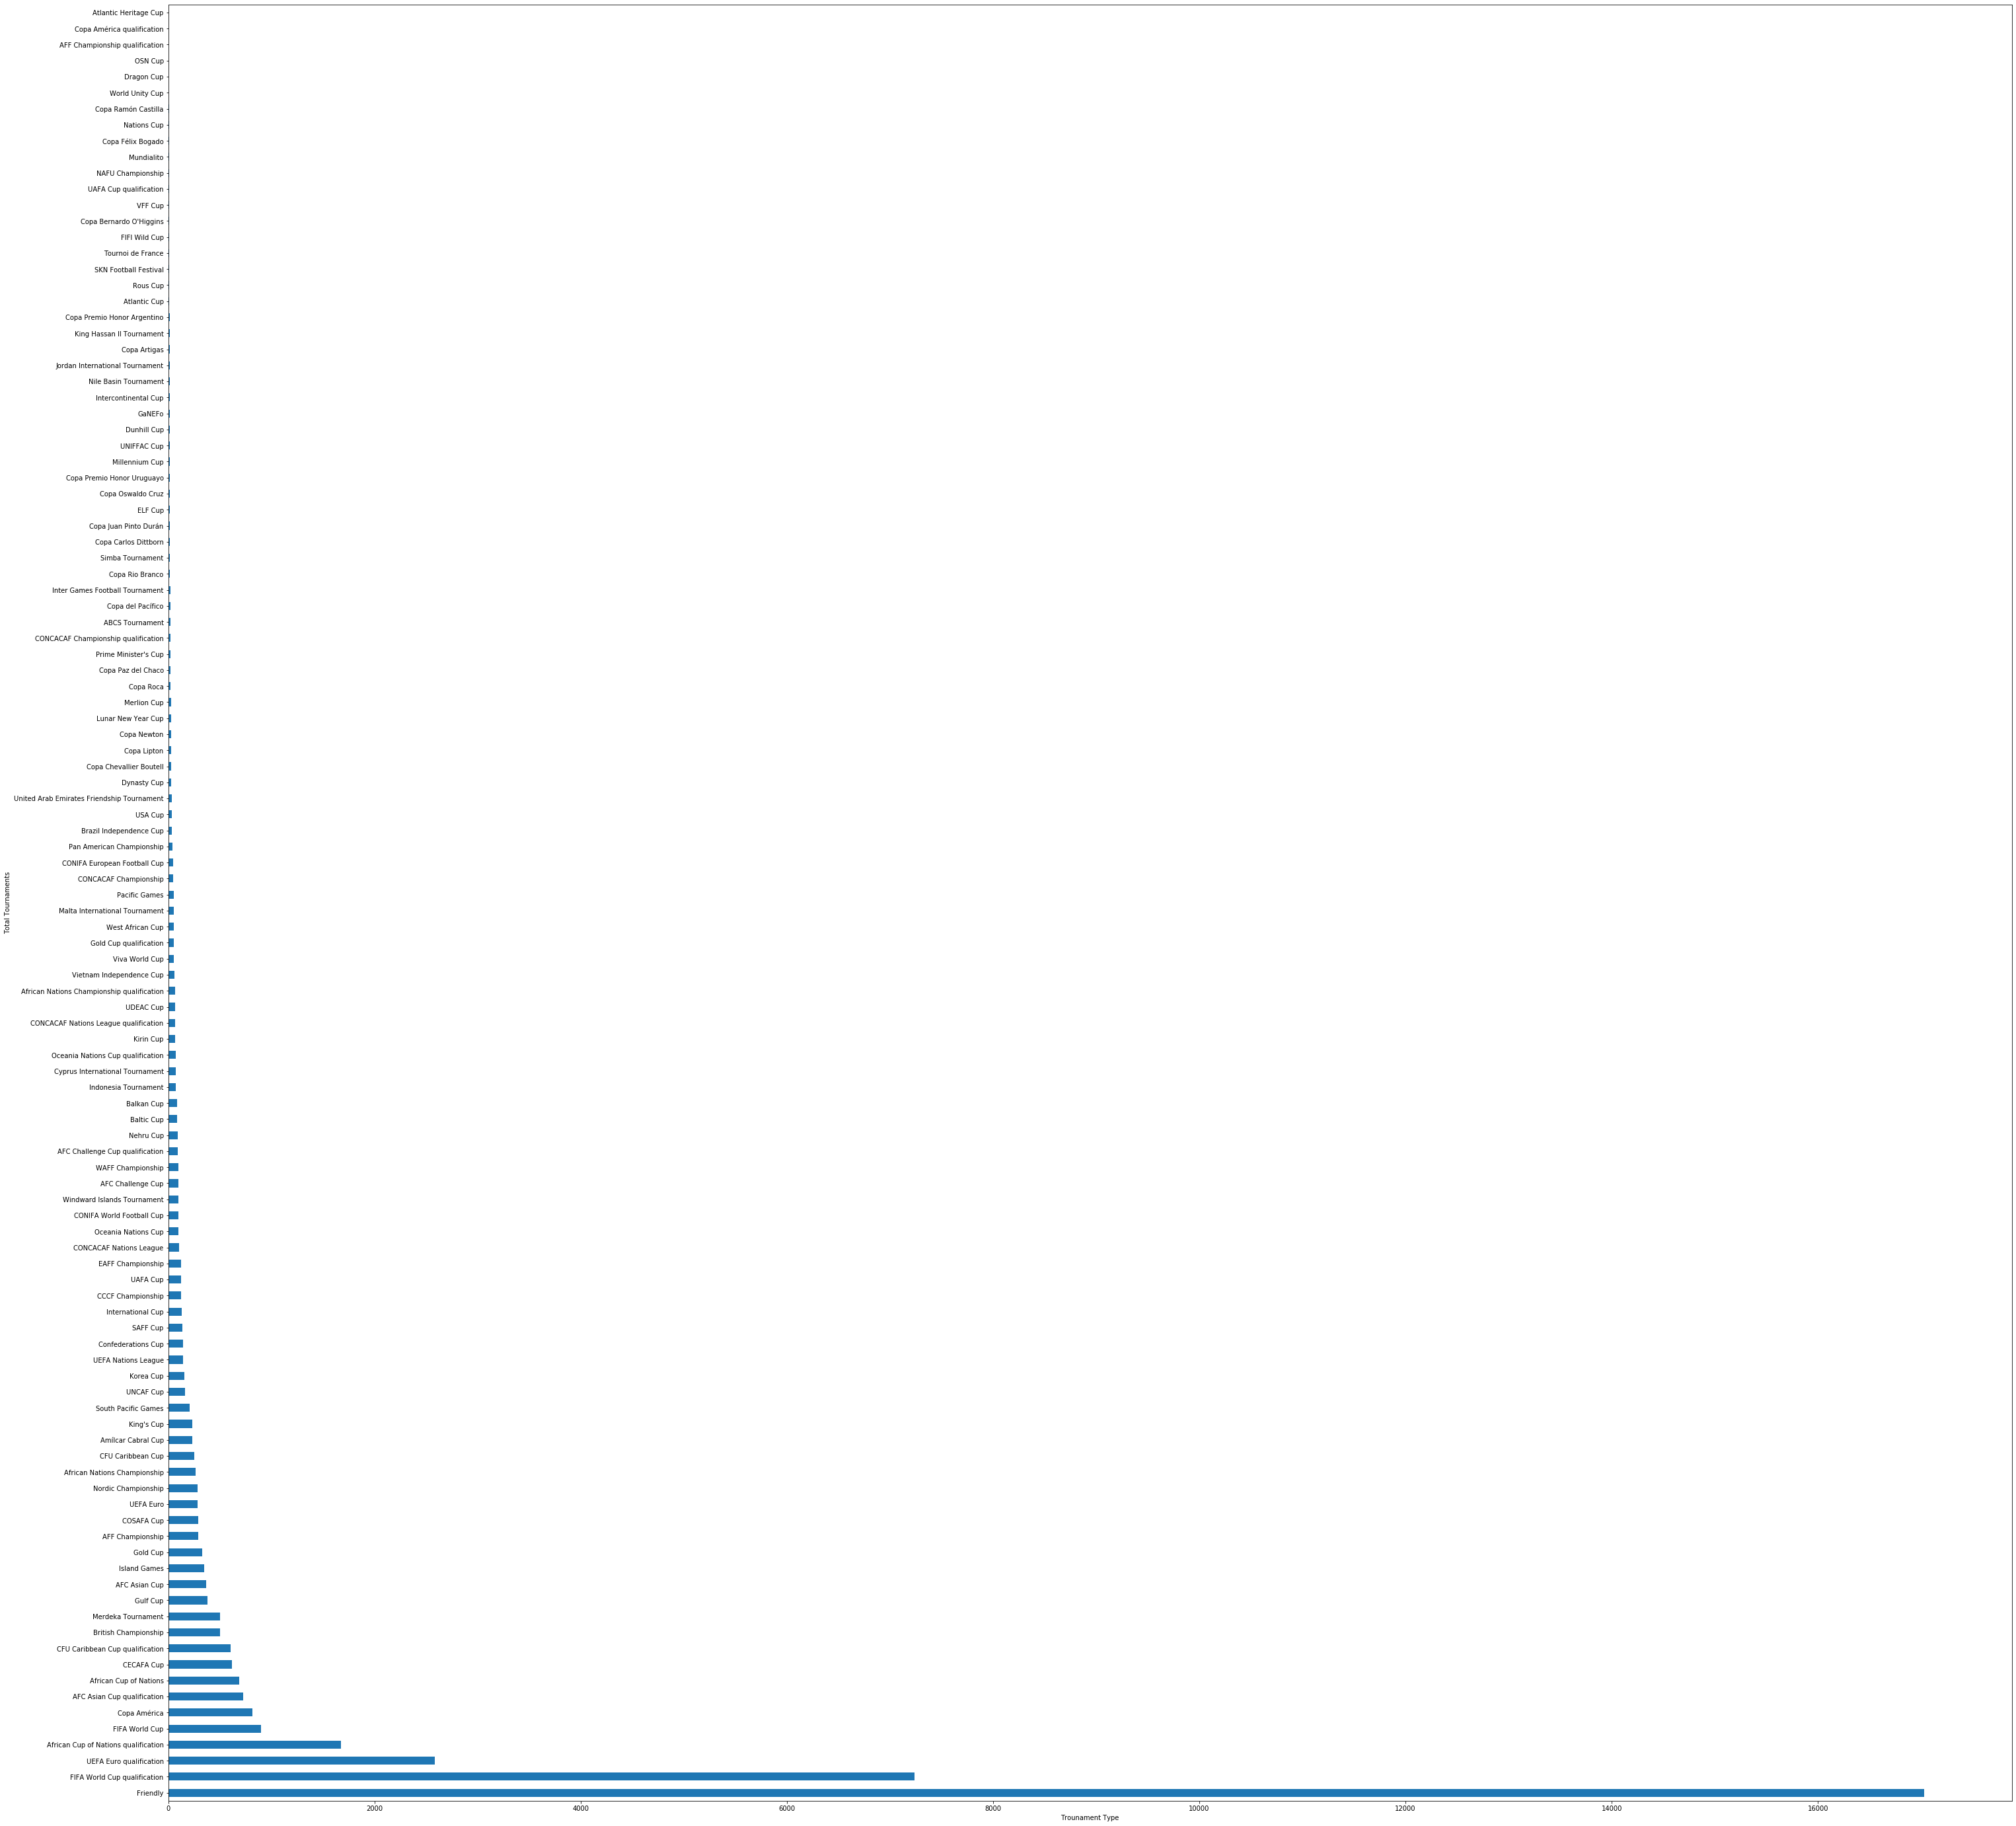

In [15]:
# lets visulatize in the form of bar graph
tournament.plot(kind="barh", figsize=(50,50))
plt.xlabel("Trounament Type")
plt.ylabel("Total Tournaments")
plt.show()

As we c an see graph is not total visible
Lets take top ten tournaments and plot a graph for it

In [16]:
# plot bar graph for top ten trounaments
top_ten_tournaments= tournament.head(10)
top_ten_tournaments

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
Copa América                              813
AFC Asian Cup qualification               724
African Cup of Nations                    690
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: tournament, dtype: int64

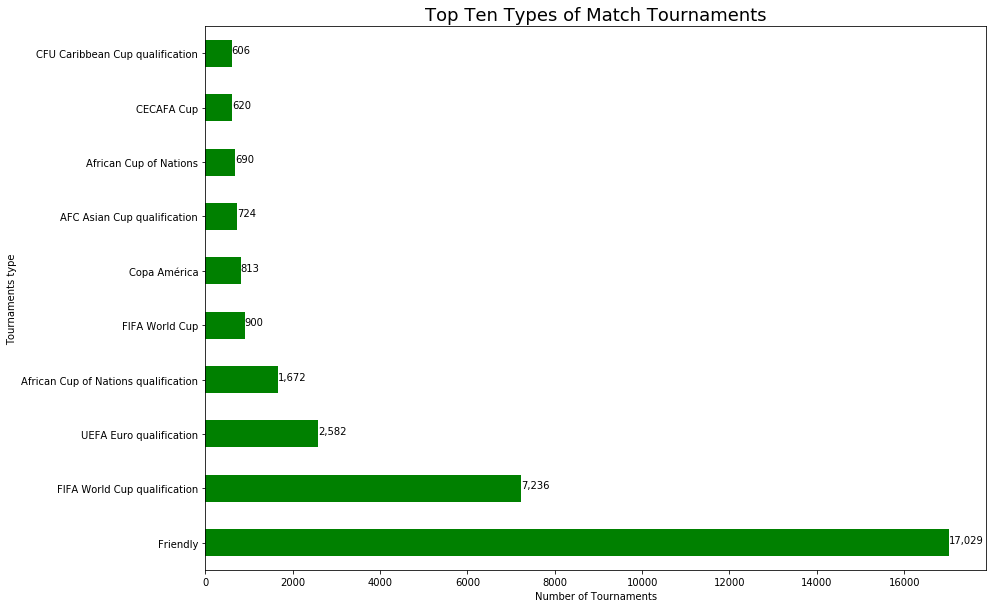

In [17]:
# plot graph for top ten tournaments
top_ten_tournaments.plot(kind="barh", figsize=(14,10), color="green" )
plt.xlabel("Number of Tournaments")
plt.ylabel("Tournaments type")
plt.title("Top Ten Types of Match Tournaments", fontsize=18)

count = 0
for value in top_ten_tournaments:
    label = format(int(value), ',')
    plt.annotate(label, xy=(int(value), count), color='black')
    count = count + 1
plt.show()

From the above graph we can see , more number of tournaments was happened for "FRINEDLY" match type.

# Check which Country has most tournaments

In [18]:
# lets count the number of tournaments in each country
tournament_country = match_data['country'].value_counts()
tournament_country

United States          1159
France                  806
England                 696
Malaysia                652
Sweden                  640
                       ... 
Belgian Congo             1
Portuguese Guinea         1
Bohemia and Moravia       1
Lautoka                   1
Micronesia                1
Name: country, Length: 266, dtype: int64

In [19]:
# top ten countries and plot bar chart for it
top_ten_tournament_country = tournament_country.head(10)
top_ten_tournament_country

United States    1159
France            806
England           696
Malaysia          652
Sweden            640
Germany           586
Brazil            529
Spain             523
Qatar             491
Thailand          486
Name: country, dtype: int64

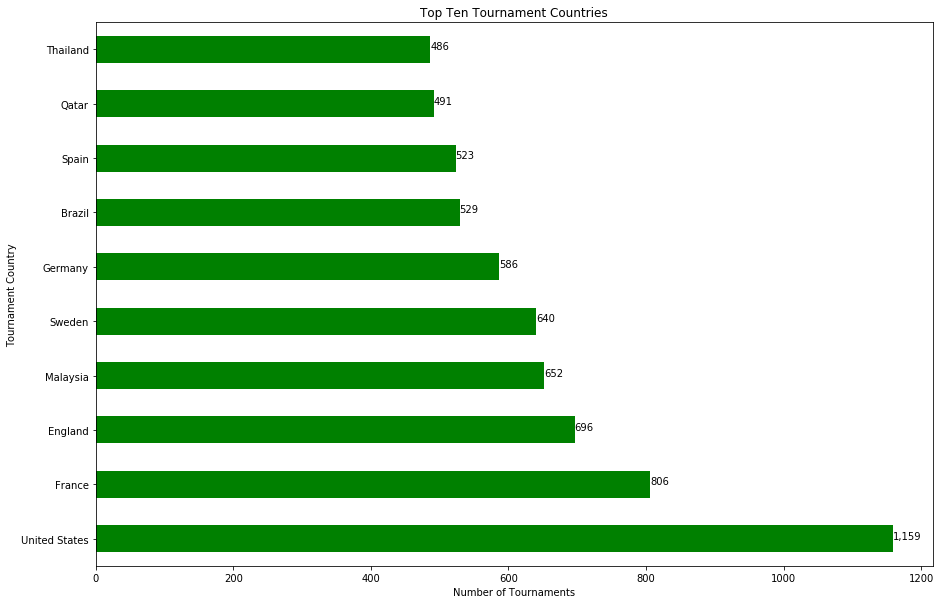

In [20]:
# graph plotting
top_ten_tournament_country.plot(kind="barh", figsize=(15,10), color="green")
plt.xlabel("Number of Tournaments")
plt.ylabel("Tournament Country")
plt.title("Top Ten Tournament Countries")

count = 0
for value in top_ten_tournament_country:
    label = format(int(value), ",")
    plt.annotate(label, xy=(int(value), count), color='black')
    count = count + 1

plt.show()

From above graph we can say, most of the tournaments happend in United States Country

# LETS CHECK WHO WON THE MOST

In [23]:
# create dataframe for the home team and away team
match_data.head()
home_team = match_data[["home_team", "home_score"]].rename(columns={"home_team":"team","home_score":"score"})
home_team

,team,score
0,Scotland,0
1,England,4
2,Scotland,2
3,England,2
4,Scotland,3
...,...,...
41581,Barbados,1
41582,Kosovo,0
41583,Canada,0
41584,El Salvador,0


In [24]:
away_team = match_data[["away_team", "away_score"]].rename(columns={"away_team":"team","away_score":"score"})
away_team

,team,score
0,England,0
1,Scotland,2
2,England,1
3,Scotland,2
4,England,0
...,...,...
41581,Canada,4
41582,Sweden,1
41583,Iceland,1
41584,Iceland,1


In [25]:
match_scores = pd.concat([home_team,away_team]).reset_index(drop=True)
match_scores

,team,score
0,Scotland,0
1,England,4
2,Scotland,2
3,England,2
4,Scotland,3
...,...,...
83167,Canada,4
83168,Sweden,1
83169,Iceland,1
83170,Iceland,1


In [27]:
# make an aggregation of the the score column group by the team
team_info = match_scores.groupby('team')['score'].agg(['sum','count']).reset_index()
team_info = team_info.rename(columns={'sum':'number_of_goals', 'count':'number_of_matches'})
team_info

,team,number_of_goals,number_of_matches
0,Abkhazia,48,28
1,Afghanistan,114,111
2,Albania,305,332
3,Alderney,15,19
4,Algeria,707,505
...,...,...,...
307,Yugoslavia,940,480
308,Zambia,1121,718
309,Zanzibar,187,205
310,Zimbabwe,625,456


# # Top Ten Goal Maker team

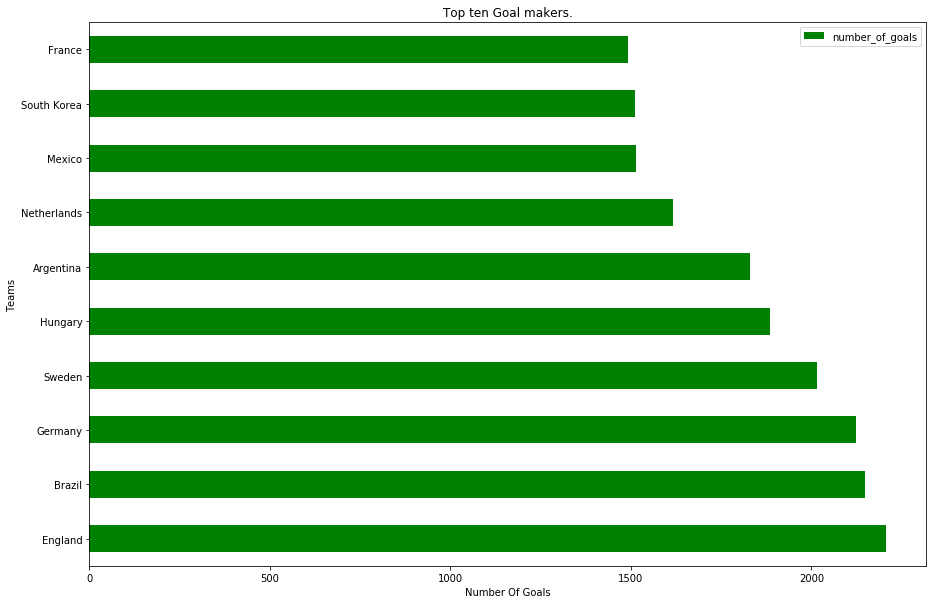

In [54]:
top_ten_goal = team_info.sort_values(by="number_of_goals", ascending=False, axis=0)[:10]
top_ten_goal_maker_team = top_ten_goal[["team", "number_of_goals"]]
top_ten_goal_maker_team.set_index("team", inplace = True)
top_ten_goal_maker_team.plot(kind="barh", figsize=(15,10), color="green")
plt.xlabel("Number Of Goals")
plt.ylabel("Teams")
plt.title("Top ten Goal makers.")
plt.show()

From the above graph we can see , England has score the most Goals.

# READ ANOTHER CSV FRP RANKING

In [55]:
ranking_data= pd.read_csv("fifa_ranking.csv")
team_ranking_data = ranking_data.loc[:,['rank', 'country_full','rank_date']]
team_ranking_data['weighted_points'] =  ranking_data['cur_year_avg_weighted'] + ranking_data['two_year_ago_weighted'] + ranking_data['three_year_ago_weighted']
team_ranking_data['rank_date'] = pd.to_datetime(team_ranking_data['rank_date'])
team_ranking_data

,rank,country_full,rank_date,weighted_points
0,1,Germany,1993-08-08,0.0
1,2,Italy,1993-08-08,0.0
2,3,Switzerland,1993-08-08,0.0
3,4,Sweden,1993-08-08,0.0
4,5,Argentina,1993-08-08,0.0
...,...,...,...,...
57788,206,Anguilla,2018-06-07,0.0
57789,206,Bahamas,2018-06-07,0.0
57790,206,Eritrea,2018-06-07,0.0
57791,206,Somalia,2018-06-07,0.0


In [96]:
# calculate the ranging for teams using total ranking , Rank got by team most of the time that will be the final ranking
# e.g germany has got ranking [1,1,2,1,3,1,1] --from which we can calculate as most the times germany got 1 ranking, so final ranking will be 1
def most_frequent(List): 
    return max(set(List), key = List.count) 

ranking_list = []
for team in zip(team_info["team"]):
    data = list(team_ranking_data["rank"][team_ranking_data["country_full"] == team[0]])
    if data:
        ranking_list.append(most_frequent(data))
    else:
        ranking_list.append(0)

team_info["rank"] = ranking_list
team_info

,team,number_of_goals,number_of_matches,rank
0,Abkhazia,48,28,0
1,Afghanistan,114,111,198
2,Albania,305,332,86
3,Alderney,15,19,0
4,Algeria,707,505,35
...,...,...,...,...
307,Yugoslavia,940,480,11
308,Zambia,1121,718,67
309,Zanzibar,187,205,0
310,Zimbabwe,625,456,70


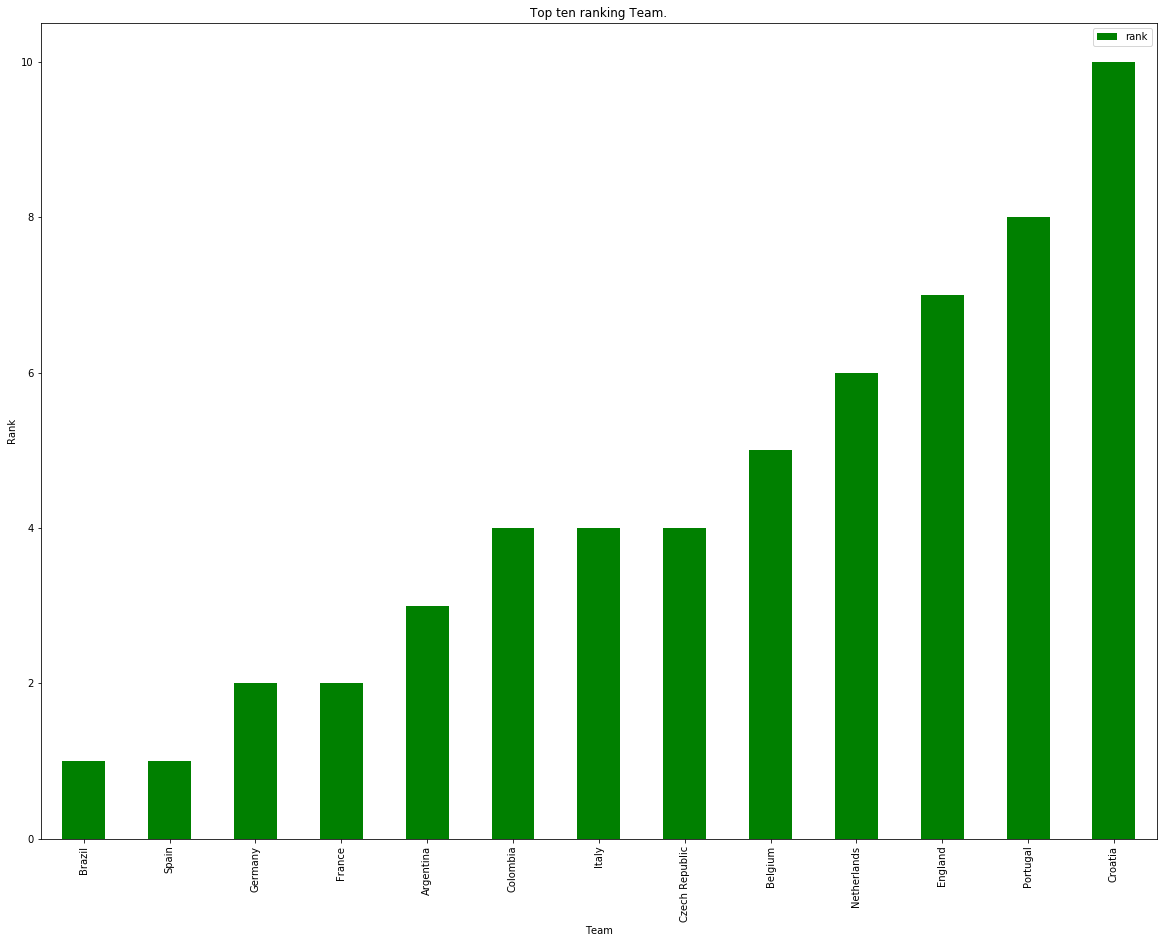

In [118]:
# top ten rank teams and plot grpah
top_ten_rank_team = team_info.sort_values(by="rank", ascending=True, axis=0)
top_ten_rank_team = top_ten_rank_team[(top_ten_rank_team["rank"] > 0) & (top_ten_rank_team["rank"] < 11)]
top_ten_rank_team = top_ten_rank_team[["team", "rank"]]
top_ten_rank_team.set_index("team", inplace = True)
top_ten_rank_team.plot(kind="bar", figsize=(20,15), color="green")
plt.xlabel("Team")
plt.ylabel("Rank")
plt.title("Top ten ranking Team.")
plt.show()

We can see from the graph as top ranking is for Brazil whereas second one is spain and so on

In [119]:
team_info.head()

,team,number_of_goals,number_of_matches,rank
0,Abkhazia,48,28,0
1,Afghanistan,114,111,198
2,Albania,305,332,86
3,Alderney,15,19,0
4,Algeria,707,505,35


# DATA MODELING

In [121]:
# import all necessary libraries
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Modeling based on number of goals

In [129]:
# create Model based on 
X, y = team_info.loc[:,['number_of_matches', 'rank']], team_info['number_of_goals']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (249, 2)
X_test shape:  (63, 2)
y_train shape:  (249,)
y_test shape:  (63,)


In [157]:
# create model object
logistic_regression_model = linear_model.LogisticRegression(C=1e-5)

In [158]:
# fit the
logistic_regression_model.fit(X_train, y_train)

C:\Users\snimje\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
# predict the data
logistic_regression_model.predict(X_test)

array([   2,    2,    7,   48,  673,    7,    2,   48,  673,   48,    2,
          2,  673,   48,  673,   48,    2,  673,    7,  476,  673,  673,
       2015,   48,    2,    2,   48,  673,  673,   48,    2,    2,    2,
       2015, 2015,    2,   48,  673,  673,    7,   48,   48,    7,    2,
         48,   48, 2015,   48,    7,   48,   48,  673,  673,    2,  673,
         48, 2015,    7,   48,    2,    2,    2,  673], dtype=int64)

In [160]:
# merasuring the accuracy of the model
# Use score method to get accuracy of model
score = logistic_regression_model.score(X_test, y_test)
print(score)

0.015873015873015872


We can see Our model prediction is not good

In [169]:
# lets use pipeline for prediction
features = PolynomialFeatures(degree=1)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logistic_regression_model)
])

In [170]:
model = model.fit(X_train, y_train)
model

C:\Users\snimje\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logistic_regression',
                 LogisticRegression(C=1e-05, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [171]:
model.predict(X_test)

array([   2,    2,    7,   48,  673,    7,    2,   48, 2015,   48,    2,
          2,  673,   48,  673,   48,    2,  673,    7,   48,  673,  673,
       2015,   48,    2,    2,   48,  673,  673,   48,    2,    2,    7,
       2015, 2015,    2,   48,  673,  673,    7,   48,   48,    7,    2,
         48,   48, 2015,   48,    7,   48,   48,  673,  673,    2,  673,
         48, 2015,   48,   48,    2,    2,    2,  673], dtype=int64)

In [174]:
model.score(X_test, y_test)

0.015873015873015872

# ANALYSIS

From above prediction values we can say tha our model is not great fit to predict the value.